# PreProcessing using scikit-learn


<img src="https://github.com/awantik/machine-learning-slides/blob/master/ML-Pipeline.png?raw=true">

## Agenda
1. Introduction to Preprocessing
2. StandardScaler
3. MinMaxScaler
4. RobustScaler
5. Normalization
6. Binarization
7. Encoding Categorical (Ordinal & Nominal) Features
8. Imputation
9. Polynomial Features
10. Custom Transformer
11. HashingVectorizer
12. Image using skimage

#### Common import

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Introduction to PreProcessing
* Learning algorithms have affinity towards certain pattern of data.
* Unscaled or unstandardized data have might have unacceptable prediction
* Learning algorithms understands only number, converting text, image to number is required
* Preprocessing refers to transformation before feeding to machine learning


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp5.PNG?raw=true">


## 2. StandardScaler
* The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
* Calculate - Subtract mean of column & div by standard deviation



<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp4.PNG?raw=true">


* If data is not normally distributed, this is not the best scaler to use.

In [ ]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 1, 10000),
    'x2': np.random.normal(10, 5, 10000),
    'x3': np.random.normal(50, 10, 10000)
})

In [ ]:
df

,x1,x2,x3
0,2.261620,16.918767,47.244813
1,-1.745467,7.661380,57.908178
2,0.848159,7.354067,46.052640
3,1.200835,19.319377,53.303364
4,-0.196719,7.823165,41.628005
...,...,...,...
9995,-1.551662,13.602933,62.125996
9996,-0.588027,5.083265,55.606639
9997,-1.614236,12.961719,60.776815
9998,1.136968,8.823980,55.081454


In [ ]:
df.describe()

,x1,x2,x3
count,10000.000000,10000.000000,10000.000000
mean,-0.010574,10.000443,49.828766
std,0.999521,4.978261,10.060542
min,-3.702638,-8.142451,9.200347
25%,-0.703380,6.682295,43.174829
50%,-0.018193,10.009120,49.889123
75%,0.673618,13.373185,56.548395
max,4.076393,28.209871,93.808531


<Axes: ylabel='Density'>

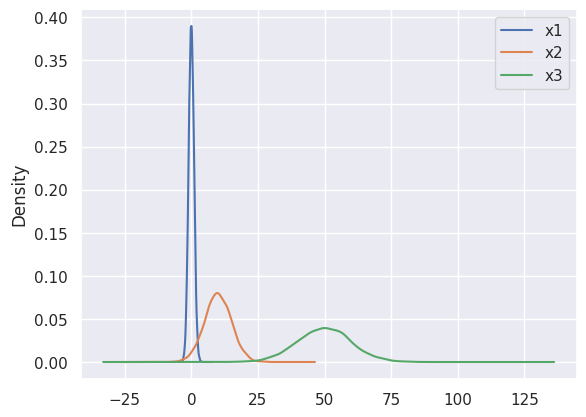

In [ ]:
# plotting data

df.plot.kde()

In [ ]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [ ]:
data_tf = standardscaler.fit_transform(df)

In [ ]:
type(data_tf)

numpy.ndarray

In [ ]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

In [ ]:
df

,x1,x2,x3
0,2.273398,1.389776,-0.256853
1,-1.735812,-0.469879,0.803119
2,0.859188,-0.531613,-0.375359
3,1.212051,1.872019,0.345386
4,-0.186243,-0.437379,-0.815182
...,...,...,...
9995,-1.541904,0.723680,1.222384
9996,-0.577759,-0.987780,0.574339
9997,-1.604511,0.594871,1.088271
9998,1.148151,-0.236332,0.522134


In [ ]:
df.describe()

,x1,x2,x3
count,10000.000000,1.000000e+04,1.000000e+04
mean,0.000000,-2.135181e-16,2.096101e-16
std,1.000050,1.000050e+00,1.000050e+00
min,-3.694020,-3.644607e+00,-4.038595e+00
25%,-0.693173,-6.665610e-01,-6.614226e-01
50%,-0.007622,1.742968e-03,5.999712e-03
75%,0.684555,6.775279e-01,6.679526e-01
max,4.089133,3.657972e+00,4.371729e+00


<Axes: ylabel='Density'>

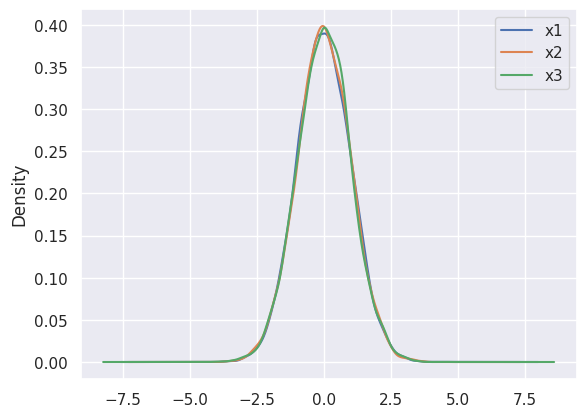

In [ ]:
df.plot.kde()

## 3. MinMaxScaler
* One of the most popular
* Calculate - Subtract min of column & div by difference between max & min




<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp3.PNG?raw=true">



* Data shifts between 0 & 1
* If distribution not suitable for StandardScaler, this scaler works out.
* Sensitive to outliers

In [ ]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

<Axes: ylabel='Density'>

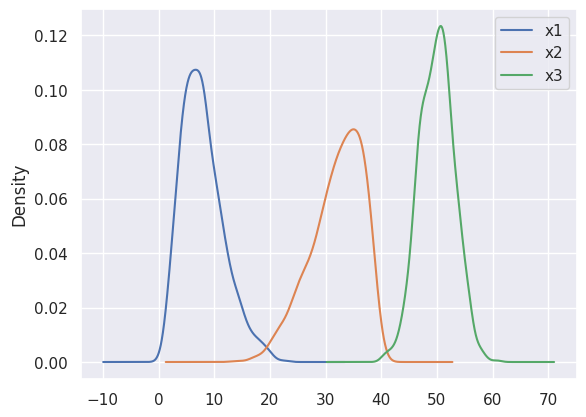

In [ ]:
df.plot.kde()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

<Axes: ylabel='Density'>

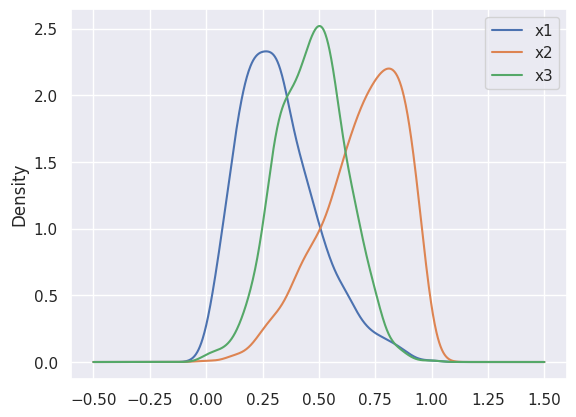

In [ ]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## 4. Robust Scaler
* Suited for data with outliers
* Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile






<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp2.PNG?raw=true">

In [ ]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.chisquare(15, 1000), np.random.normal(50, 1, 25)]),
})

<Axes: ylabel='Density'>

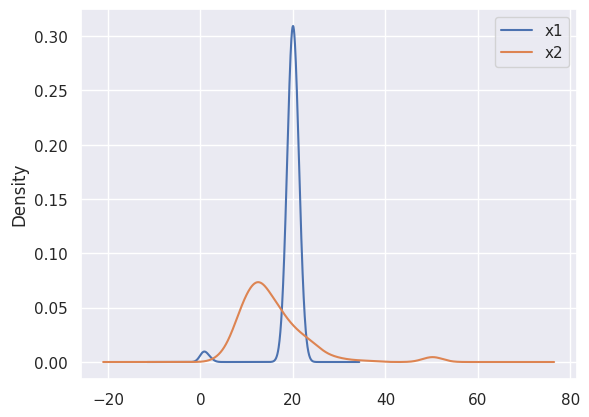

In [ ]:
df.plot.kde()

In [ ]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [ ]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

In [ ]:
df

,x1,x2
0,0.187983,0.952935
1,0.264061,-0.854422
2,0.624932,-0.519562
3,-1.034318,-0.583805
4,1.144324,-1.354172
...,...,...
1020,-14.108230,4.770013
1021,-13.448631,4.645771
1022,-13.010456,4.746668
1023,-12.758650,4.688514


In [ ]:
df.describe()

,x1,x2
count,1025.000000,1025.000000
mean,-0.282331,0.237747
std,2.240825,1.026318
min,-14.478004,-1.394756
25%,-0.480011,-0.391580
50%,0.000000,0.000000
75%,0.519989,0.608420
max,2.119080,5.019466


<Axes: ylabel='Density'>

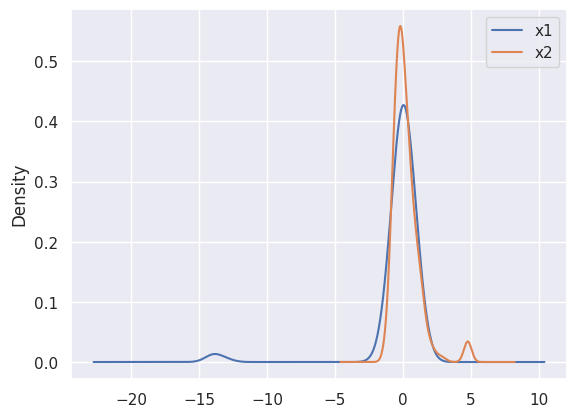

In [ ]:
df.plot.kde()

## 5. Normalizer
* Each parameter value is obtained by dividing by magnitude


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp1.PNG?raw=true">
* Centralizes data to origin

In [ ]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-20, 80, 1000).astype(float),
    'z1': np.random.randint(-50, 150, 1000).astype(float),
})

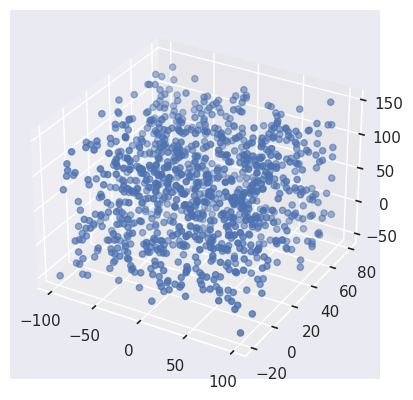

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [ ]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

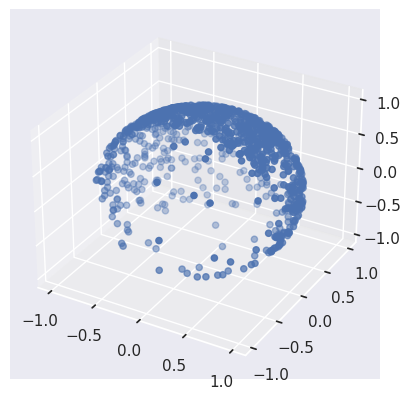

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## 6. Binarization
* Thresholding numerical values to binary values ( 0 or 1 )
* A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes

In [ ]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=1.0)

In [ ]:
data_tf = binarizer.fit_transform(X)

In [ ]:
data_tf

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

## 7. Encoding Categorical Values
#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [ ]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [ ]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [ ]:
df.Income.map({'Low':1,'Medium':2,'High':3})

,Income
0,1
1,1
2,3
3,2
4,2
5,3


#### PS: We can use transformer class for this as well, we will see that later

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [ ]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22,35],
    'Gender':['Male','Female','Male','Female','Male','Male','LGBTQ']})

In [ ]:
df.Gender.unique()

array(['Male', 'Female', 'LGBTQ'], dtype=object)

In [ ]:
print(pd.get_dummies(df.Gender))

   Female  LGBTQ   Male
0   False  False   True
1    True  False  False
2   False  False   True
3    True  False  False
4   False  False   True
5   False  False   True
6   False   True  False


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [ ]:
df

,Age,Gender,gender_tf
0,33,Male,2
1,44,Female,0
2,22,Male,2
3,44,Female,0
4,55,Male,2
5,22,Male,2
6,35,LGBTQ,1


In [ ]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [ ]:
df['Income_label'] = le.fit_transform(df.Income)

In [ ]:
df

,Age,Income,Income_label
0,33,Low,1
1,44,Low,1
2,22,High,0
3,44,Medium,2
4,55,Medium,2
5,22,High,0


## 8. Imputation
* Missing values cannot be processed by learning algorithms
* Imputers can be used to infer value of missing data from existing data

In [ ]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,10,np.nan,4,5]
})

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [ ]:
df_copy = imputer.fit_transform(df)

In [ ]:
df_copy

array([[ 1. ,  3. ],
       [ 2. ,  4. ],
       [ 3. , 10. ],
       [ 4. ,  5.2],
       [ 3.4,  4. ],
       [ 7. ,  5. ]])

## 9. Polynomial Features
* Deriving non-linear feature by coverting data into higher degree
* Used with linear regression to learn model of higher degree

In [ ]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=3, include_bias=True)

In [ ]:
pol.fit_transform(df)

array([[  1.,   1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   3.,   4.,   9.,  12.,  16.,  27.,  36.,  48.,  64.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.],
       [  1.,   5.,   6.,  25.,  30.,  36., 125., 150., 180., 216.]])

## 10. Custom Transformer
* Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing.
* FunctionTransformer is used to create one Transformer
* validate = False, is required for string columns

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [ ]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [ ]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [ ]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


In [ ]:
print (type(customtransformer))

<class 'sklearn.preprocessing._function_transformer.FunctionTransformer'>


## 11. HashingVectorizer
* All above techniques converts data into table where each word is converted to column
* Learning on data with lakhs of columns is difficult to process
* HashingVectorizer is an useful technique for out-of-core learning
* Multiple words are hashed to limited column
* Limitation - Hashed value to word mapping is not possible

In [ ]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5],
    'Text':['I','am','going','the','opposite','way']
})

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=5)

In [ ]:
hv.fit_transform(df.Text).toarray()

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0., -1.,  0.],
       [ 0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## 12. Image Processing using skimage
* skimage doesn't come with anaconda. install with 'pip install skimage'
* Images should be converted from 0-255 scale to 0-1 scale.
* skimage takes image path & returns numpy array
* images consist of 3 dimension


In [ ]:
! pip install scikit-image

In [ ]:
from skimage.io import imread,imshow

In [62]:
image = imread('/content/dog.png')

In [63]:
image.shape

(407, 612, 3)

array([[[ 97, 139, 173],
        [ 97, 139, 173],
        [ 98, 140, 174],
        ...,
        [171, 185, 185],
        [170, 183, 183],
        [170, 183, 183]],

       [[101, 141, 175],
        [101, 141, 175],
        [102, 142, 176],
        ...,
        [170, 183, 185],
        [169, 182, 184],
        [169, 182, 184]],

       [[107, 145, 178],
        [107, 145, 178],
        [108, 146, 179],
        ...,
        [163, 179, 183],
        [163, 179, 183],
        [163, 179, 183]],

       ...,

       [[ 39,  15,   5],
        [ 39,  18,   7],
        [ 40,  21,   9],
        ...,
        [ 41,  34,  25],
        [ 44,  36,  27],
        [ 45,  37,  28]],

       [[ 60,  33,  21],
        [ 58,  32,  20],
        [ 53,  33,  19],
        ...,
        [ 42,  35,  26],
        [ 44,  36,  27],
        [ 44,  36,  27]],

       [[ 81,  49,  37],
        [ 75,  45,  32],
        [ 65,  43,  28],
        ...,
        [ 44,  36,  27],
        [ 45,  37,  28],
        [ 44,  36,  27]]], dtype=uint8)
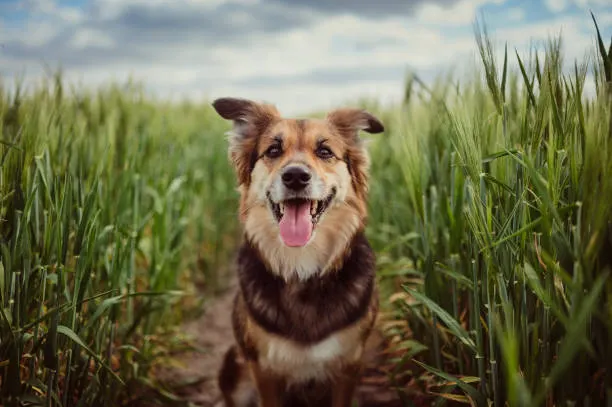

In [64]:
image

In [65]:
image[0]

array([[ 97, 139, 173],
       [ 97, 139, 173],
       [ 98, 140, 174],
       ...,
       [171, 185, 185],
       [170, 183, 183],
       [170, 183, 183]], dtype=uint8)

<ipython-input-66-3d9a59bd2b38>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(image)


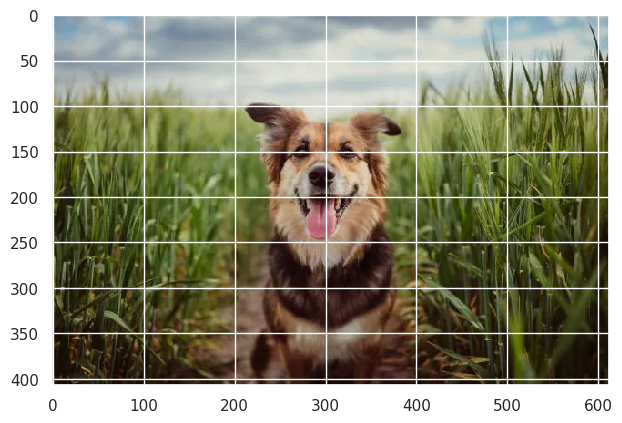

In [66]:
imshow(image)

In [67]:
from skimage.color import rgb2gray

In [71]:
rgb2gray(image).shape

(407, 612)

In [72]:
print(rgb2gray(image))

[[0.51971137 0.51971137 0.52363294 ... 0.71382353 0.70681373 0.70681373]
 [0.52922118 0.52922118 0.53314275 ... 0.70737922 0.70345765 0.70345765]
 [0.54629137 0.54629137 0.55021294 ... 0.68975843 0.68975843 0.68975843]
 ...
 [0.07599608 0.08497804 0.09479333 ... 0.13662196 0.14529843 0.14922   ]
 [0.14851882 0.14376392 0.14212    ... 0.14054353 0.14529843 0.14529843]
 [0.21543059 0.1977949  0.18271961 ... 0.14529843 0.14922    0.14529843]]


In [73]:
rgb_image = rgb2gray(image)

In [75]:
rgb_image[200:300]= 0

<ipython-input-76-63e210535183>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(rgb_image)


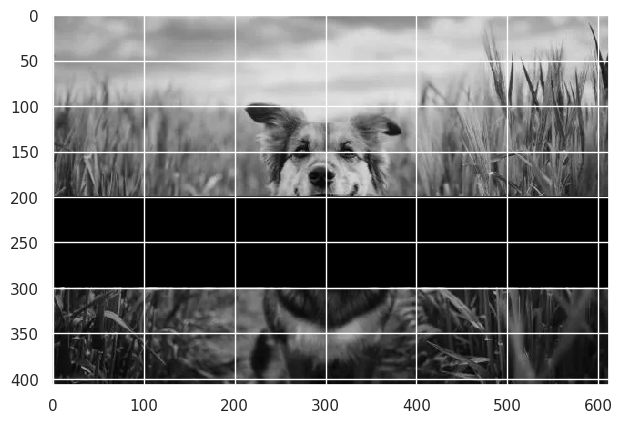

In [76]:
imshow(rgb_image)

In [77]:
from skimage.transform import resize

<ipython-input-78-08fb5a9e1cd2>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(resize(image, (200, 150)))


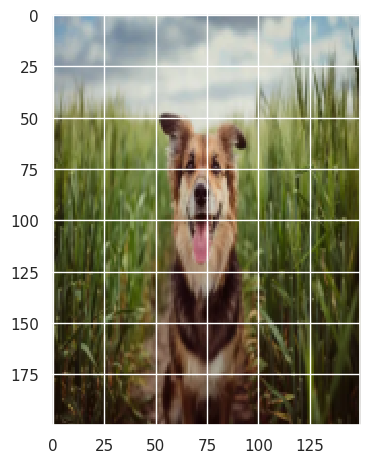

In [78]:
imshow(resize(image, (200, 150)))